Habib ur Rehman Owasi

6637017

# Assignment: due date January 22, 2024

b) [2.5 points] From Breast_Cancer.csv data, please create an Adaptive Boost, a Gradient Boost Tree and a XGBoost Tree to classify between cancer and non cancer by using python



In [ ]:
# Load necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Feature Selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Balance class
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Boosting Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# Model evaluation metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

In [ ]:
# Read the CSV files
df = pd.read_csv('Breast_Cancer.csv')
df.head()

,severity,bdate,marital,breastfa,nobreast,sebreast,nosecon,ovafam,noova,cancerfa,...,childsmo,housesmo,worksmo,alc,nobrefed,dur_brefed,diag_cancer,inj,stopinjm,durinjm
0,Category2,07feb2485,married,No,0.0,No,0.0,No,0.0,No,...,No,Yes,Yes,Never,4,111.0,non-cancer,1.0,NaN,NaN
1,Category2,01nov2486,married,No,0.0,No,0.0,No,0.0,Yes,...,No,No,No,Current user,2,2.0,non-cancer,1.0,NaN,NaN
2,Category2,18may2490,married,No,0.0,No,0.0,No,0.0,No,...,Yes,No,No,Never,2,4.0,non-cancer,1.0,NaN,NaN
3,Category2,08dec2488,window,No,0.0,No,0.0,No,0.0,No,...,No,Yes,No,Never,0,0.0,non-cancer,1.0,NaN,NaN
4,Category2,13dec2489,married,No,0.0,No,0.0,No,0.0,No,...,No,No,No,Never,2,2.0,non-cancer,1.0,NaN,NaN


## Initial Data Analysis

In [ ]:
df.dtypes

severity        object
bdate           object
marital         object
breastfa        object
nobreast       float64
sebreast        object
nosecon        float64
ovafam          object
noova          float64
cancerfa        object
weight         float64
height         float64
age_new          int64
ht_new          object
dm_new          object
agedm          float64
ckd_new         object
dlp_new         object
agemen         float64
parity          object
noparity       float64
abort           object
noabort          int64
nochild          int64
agechild       float64
brefed          object
menopau         object
agemeno        float64
menonat         object
hrt             object
stophrtm       float64
durhrtm        float64
oc              object
stopocm        float64
durocm         float64
smok            object
childsmo        object
housesmo        object
worksmo         object
alc             object
nobrefed         int64
dur_brefed     float64
diag_cancer     object
inj        

In [ ]:
# Checking for missing values
df.isna().sum()

severity          14
bdate              0
marital           25
breastfa          21
nobreast          23
sebreast          27
nosecon           31
ovafam            40
noova             40
cancerfa          24
weight             3
height            10
age_new            0
ht_new             0
dm_new             0
agedm          14691
ckd_new            0
dlp_new            0
agemen           252
parity             0
noparity           1
abort              0
noabort            0
nochild            0
agechild        5428
brefed            13
menopau            0
agemeno         5534
menonat         4581
hrt               71
stophrtm       13621
durhrtm        13082
oc                28
stopocm        11409
durocm         11196
smok              16
childsmo          55
housesmo          52
worksmo           63
alc               17
nobrefed           0
dur_brefed        27
diag_cancer        0
inj               44
stopinjm       14826
durinjm        14744
dtype: int64

In [ ]:
df.shape

(15718, 46)

## Handling Missing values

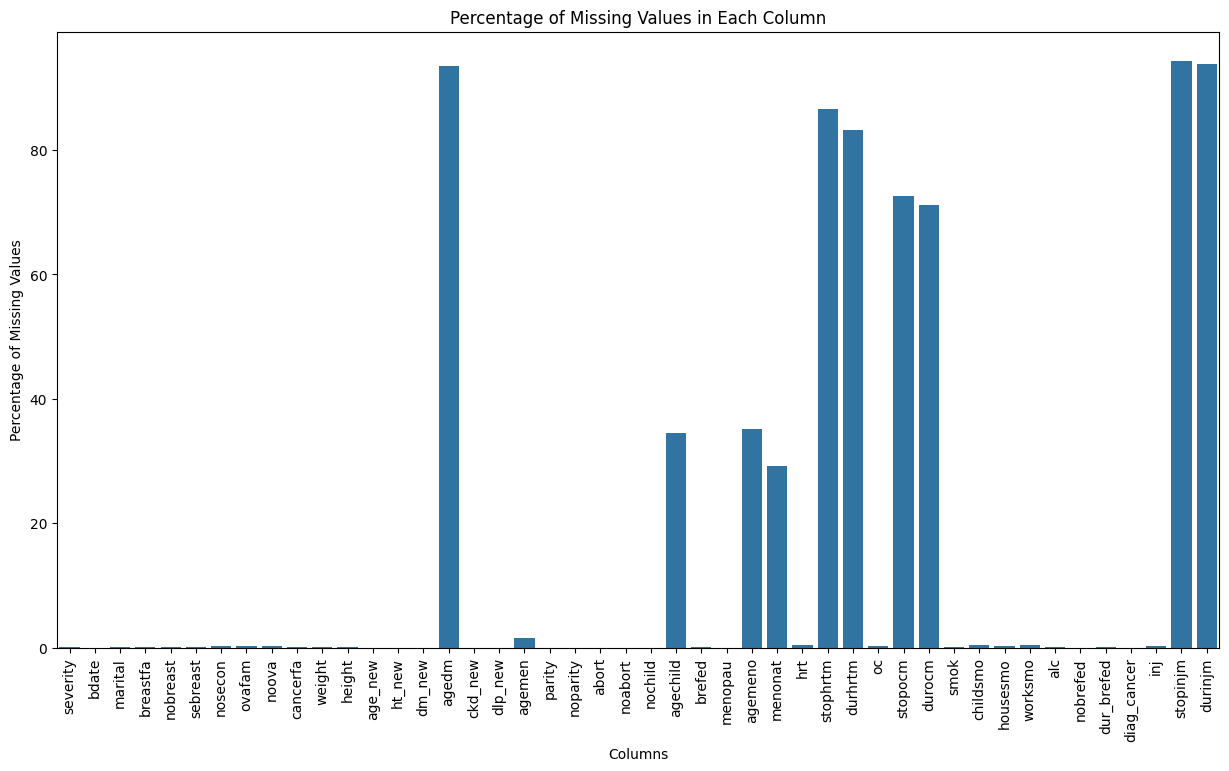

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isna().sum() / len(df)) * 100

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(x=missing_percentage.index, y=missing_percentage)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Columns')
plt.title('Percentage of Missing Values in Each Column')
plt.show()

In [ ]:
# Identifying columns with missing values more than 50%
threshold = 50
columns_to_remove = missing_percentage[missing_percentage > threshold].index.tolist()
columns_to_remove

['agedm', 'stophrtm', 'durhrtm', 'stopocm', 'durocm', 'stopinjm', 'durinjm']

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100

# Displaying missing values and their percentages
missing_data_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})
missing_data_summary[missing_data_summary['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

,Missing Values,Percentage (%)
stopinjm,14826,94.324978
durinjm,14744,93.803283
agedm,14691,93.466090
stophrtm,13621,86.658608
durhrtm,13082,83.229419
stopocm,11409,72.585571
durocm,11196,71.230436
agemeno,5534,35.208042
agechild,5428,34.533656
menonat,4581,29.144929


In [ ]:
# Removing columns with more than 50% missing values
columns_to_drop = missing_data_summary[missing_data_summary['Percentage (%)'] > 50].index
cancer_data_cleaned = df.drop(columns=columns_to_drop)

#### Imputing missing values
For categorical data, we will use the mode (most frequent value)
For numerical data, we will use the median (to avoid the influence of outliers)

In [ ]:
# Identifying categorical and numerical columns
categorical_cols = cancer_data_cleaned.select_dtypes(include=['object']).columns
numerical_cols = cancer_data_cleaned.select_dtypes(exclude=['object']).columns

# Imputation
for col in categorical_cols:
    mode_value = cancer_data_cleaned[col].mode()[0]
    cancer_data_cleaned[col].fillna(mode_value, inplace=True)

for col in numerical_cols:
    median_value = cancer_data_cleaned[col].median()
    cancer_data_cleaned[col].fillna(median_value, inplace=True)

In [ ]:
# Checking if all missing values have been handled
remaining_missing_values = cancer_data_cleaned.isnull().sum().sum()
remaining_missing_values

0

In [ ]:
df.dtypes

severity        object
bdate           object
marital         object
breastfa        object
nobreast       float64
sebreast        object
nosecon        float64
ovafam          object
noova          float64
cancerfa        object
weight         float64
height         float64
age_new          int64
ht_new          object
dm_new          object
agedm          float64
ckd_new         object
dlp_new         object
agemen         float64
parity          object
noparity       float64
abort           object
noabort          int64
nochild          int64
agechild       float64
brefed          object
menopau         object
agemeno        float64
menonat         object
hrt             object
stophrtm       float64
durhrtm        float64
oc              object
stopocm        float64
durocm         float64
smok            object
childsmo        object
housesmo        object
worksmo         object
alc             object
nobrefed         int64
dur_brefed     float64
diag_cancer     object
inj        

In [ ]:
df.describe()

,nobreast,nosecon,noova,weight,height,age_new,agedm,agemen,noparity,noabort,...,agemeno,stophrtm,durhrtm,stopocm,durocm,nobrefed,dur_brefed,inj,stopinjm,durinjm
count,15695.00000,15687.000000,15678.000000,15715.000000,15708.000000,15718.000000,1027.000000,15466.000000,15717.000000,15718.000000,...,10184.000000,2097.000000,2636.000000,4309.000000,4522.000000,15718.000000,15691.000000,15674.000000,892.000000,974.000000
mean,0.09194,0.064831,0.009759,57.873707,155.828546,54.976969,50.701071,14.072546,1.534962,0.217521,...,48.959250,0.211254,0.822079,0.076352,1.022556,1.069920,6.919253,1.068075,0.163677,1.968172
std,0.31104,0.281508,0.139598,9.513480,5.381061,8.744162,8.914431,1.779769,1.423050,0.578577,...,4.493452,1.149057,1.832197,0.724277,2.006939,1.175998,14.444979,0.271626,1.065795,2.835325
min,0.00000,0.000000,0.000000,34.000000,135.000000,20.000000,16.000000,8.000000,0.000000,0.000000,...,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,51.000000,152.000000,49.000000,45.000000,13.000000,0.000000,0.000000,...,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,57.000000,156.000000,55.000000,50.000000,14.000000,2.000000,0.000000,...,50.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,63.000000,160.000000,61.000000,56.000000,15.000000,2.000000,0.000000,...,52.000000,0.000000,0.000000,0.000000,1.000000,2.000000,6.000000,1.000000,0.000000,3.000000
max,3.00000,4.000000,9.000000,120.000000,185.000000,90.000000,78.000000,20.000000,14.000000,8.000000,...,65.000000,11.000000,10.000000,11.000000,11.000000,5.000000,252.000000,3.000000,11.000000,11.000000


In [ ]:
df.select_dtypes(include=['object']).columns.nunique()

24

## Data Encoding

In [ ]:
# One-hot encoding for nominal categorical variables
cancer_data_encoded = pd.get_dummies(cancer_data_cleaned, columns=categorical_cols,
                                     drop_first=True)

# Displaying the first few rows of the encoded dataset
cancer_data_encoded.head()

,nobreast,nosecon,noova,weight,height,age_new,agemen,noparity,noabort,nochild,...,oc_Ex user,oc_Never,smok_Ex user,smok_Never,childsmo_Yes,housesmo_Yes,worksmo_Yes,alc_Ex user,alc_Never,diag_cancer_non-cancer
0,0.0,0.0,0.0,63.0,163.0,70,16.0,4.0,0,4,...,1,0,0,1,0,1,1,0,1,1
1,0.0,0.0,0.0,56.0,152.0,69,16.0,2.0,0,2,...,0,1,0,1,0,0,0,0,0,1
2,0.0,0.0,0.0,51.5,156.0,65,13.0,2.0,0,2,...,1,0,0,1,1,0,0,0,1,1
3,0.0,0.0,0.0,64.0,148.0,66,18.0,0.0,0,0,...,0,1,0,1,0,1,0,0,1,1
4,0.0,0.0,0.0,60.0,157.0,65,16.0,2.0,0,2,...,0,1,0,1,0,0,0,0,1,1


In [ ]:
# features for statistical summary
selected_features = numerical_cols.tolist() + cancer_data_encoded.columns[-10:].tolist()
selected_data = cancer_data_encoded[selected_features]

# Statistical Summary
selected_numerical_summary = selected_data.describe()
selected_numerical_summary.transpose()

,count,mean,std,min,25%,50%,75%,max
nobreast,15718.0,0.091806,0.310832,0.0,0.0,0.0,0.0,3.0
nosecon,15718.0,0.064703,0.281245,0.0,0.0,0.0,0.0,4.0
noova,15718.0,0.009734,0.139421,0.0,0.0,0.0,0.0,9.0
weight,15718.0,57.873540,9.512580,34.0,51.0,57.0,63.0,120.0
height,15718.0,155.828655,5.379350,135.0,152.0,156.0,160.0,185.0
age_new,15718.0,54.976969,8.744162,20.0,49.0,55.0,61.0,90.0
agemen,15718.0,14.071383,1.765467,8.0,13.0,14.0,15.0,20.0
noparity,15718.0,1.534992,1.423010,0.0,0.0,2.0,2.0,14.0
noabort,15718.0,0.217521,0.578577,0.0,0.0,0.0,0.0,8.0
nochild,15718.0,1.317343,1.205623,0.0,0.0,1.0,2.0,14.0


## EDA

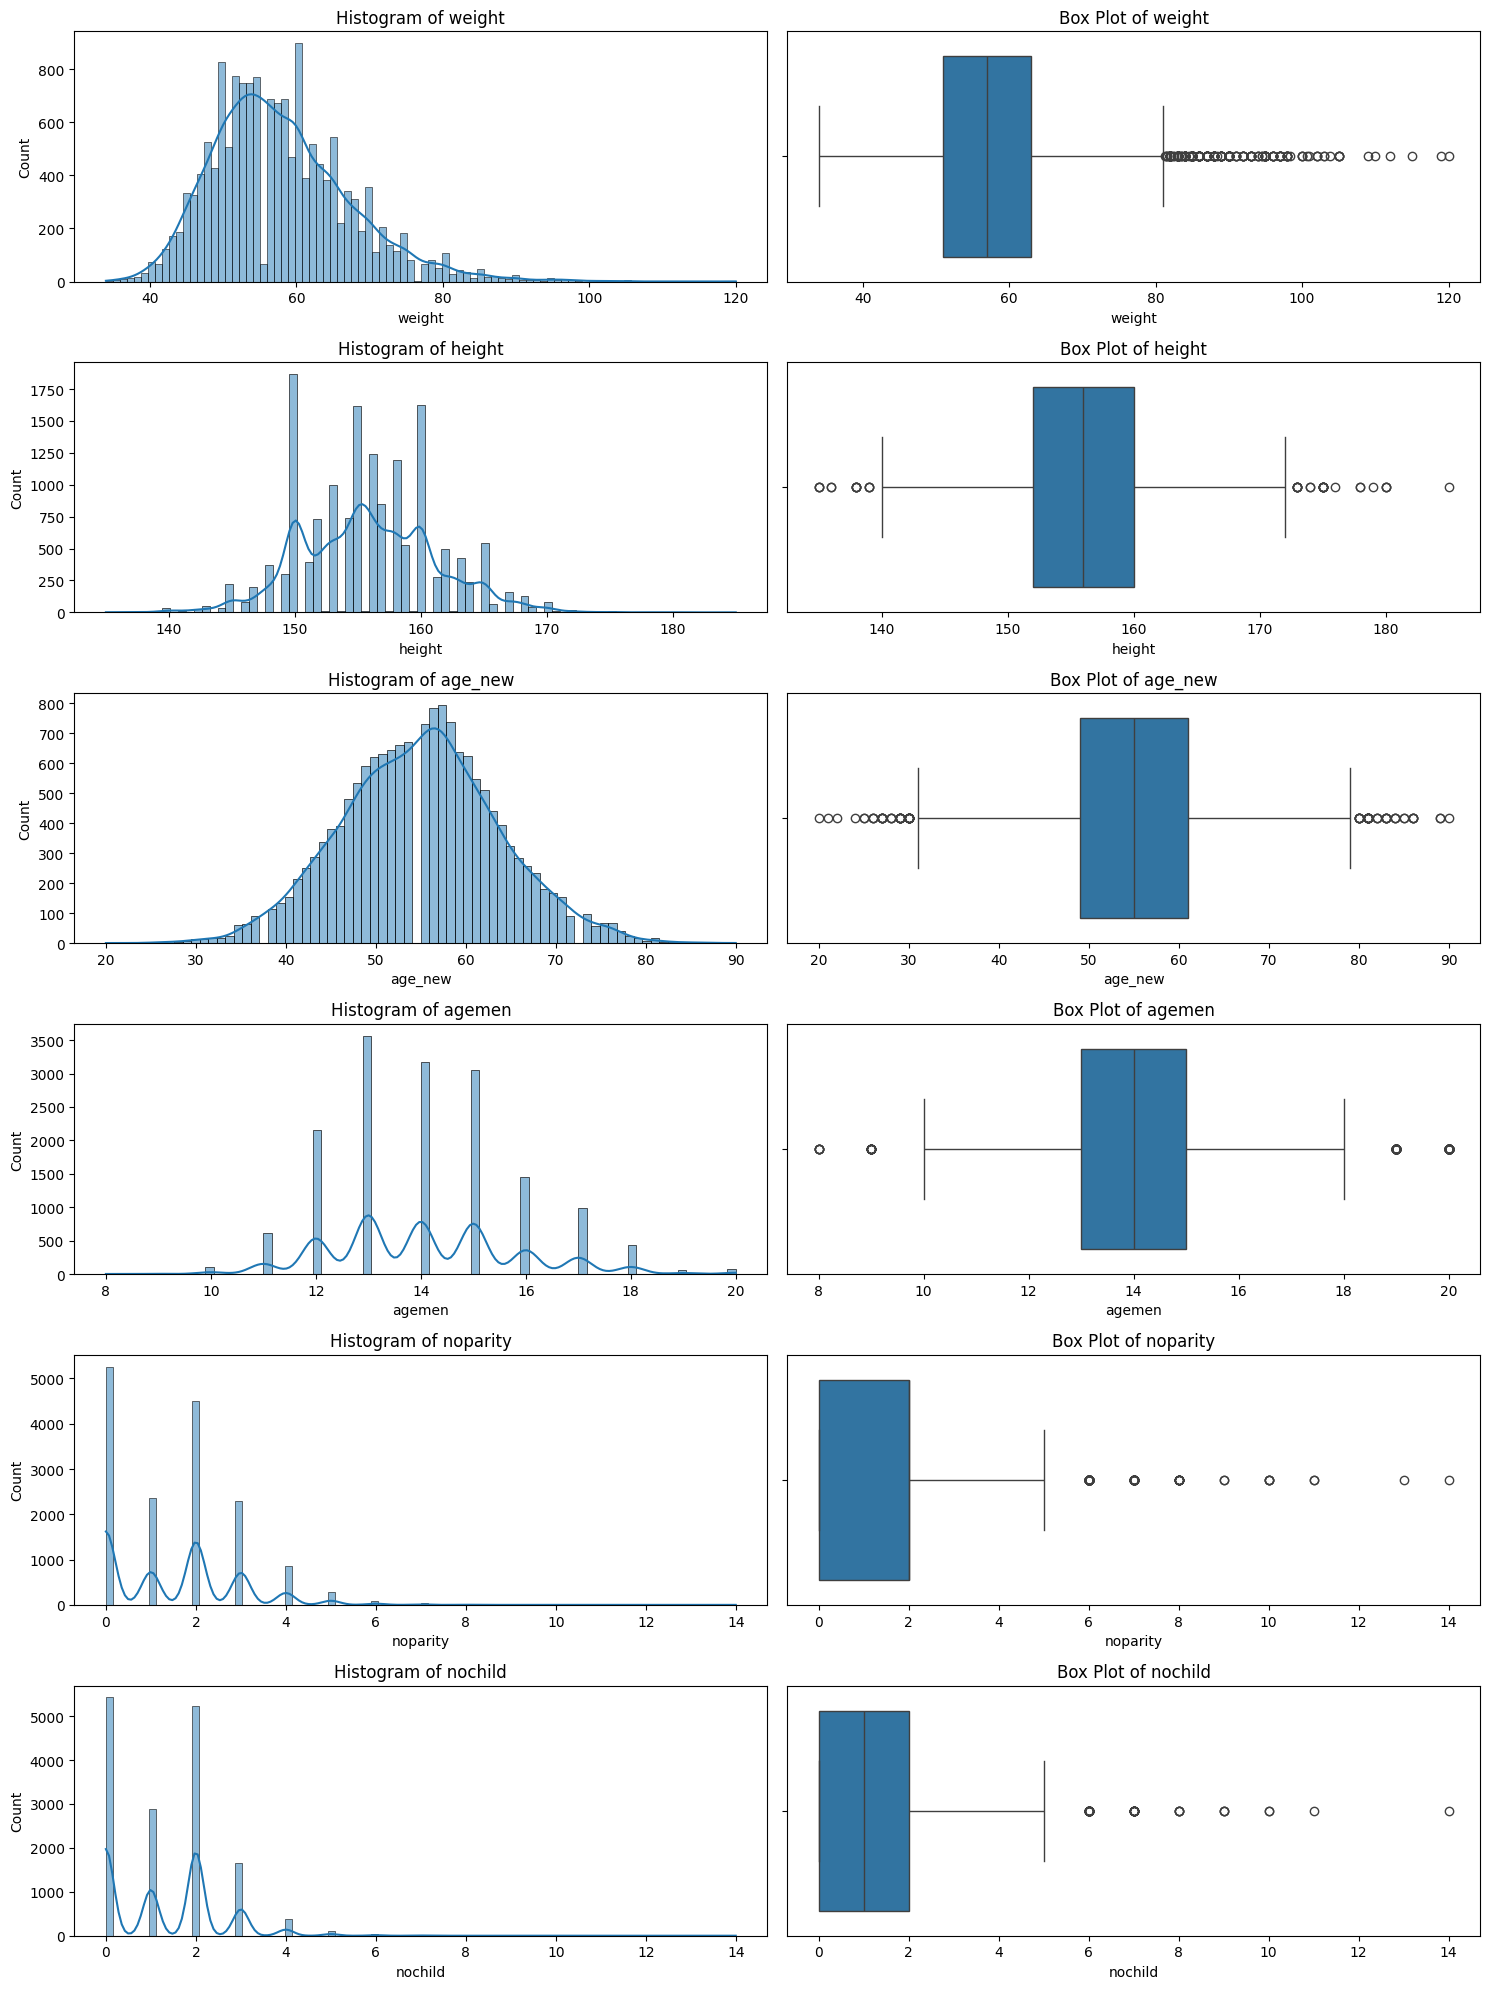

In [ ]:
features_for_visualization = ['weight', 'height', 'age_new', 'agemen', 'noparity', 'nochild']

# Plotting histograms and box plots for the selected features
fig, axes = plt.subplots(len(features_for_visualization), 2, figsize=(15, 20))

for i, col in enumerate(features_for_visualization):
    # Histogram
    sns.histplot(cancer_data_cleaned[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Count')

    # Box Plot
    sns.boxplot(x=cancer_data_cleaned[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {col}')
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

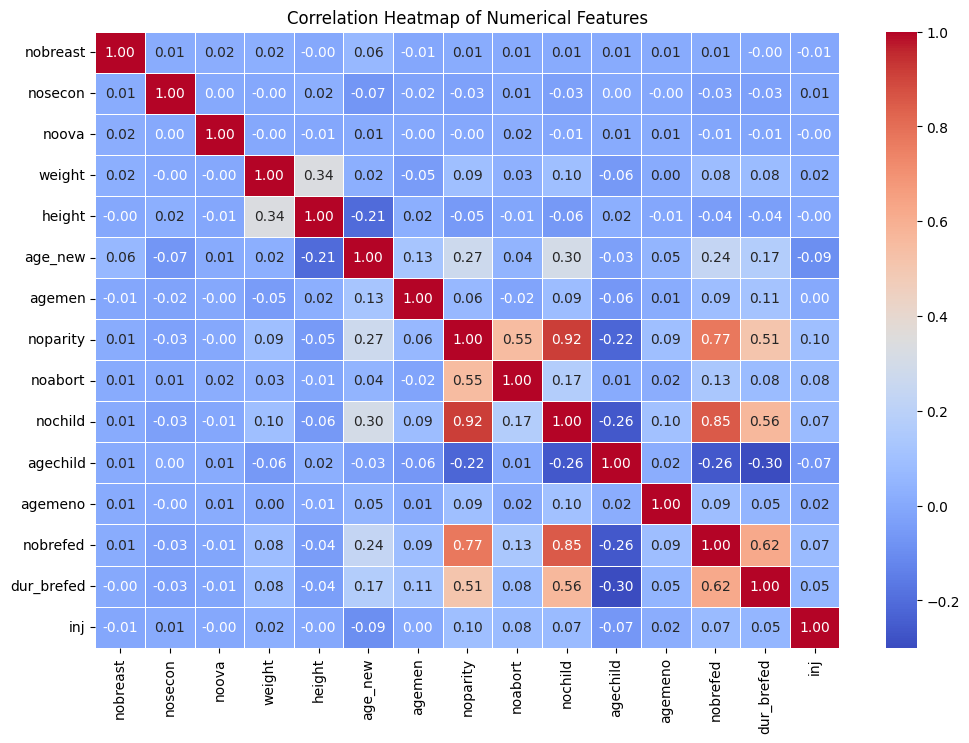

In [ ]:
# Correlation Heatmap of numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = cancer_data_cleaned[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Feature Importance

In [ ]:
target = 'diag_cancer_non-cancer'
X = cancer_data_encoded.drop(target, axis=1)
y = cancer_data_encoded[target]

In [ ]:
# Splitting the data into training and testing sets 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest Classifier

In [ ]:
# Building a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predicting on the test set
y_pred = rf_classifier.predict(X_test_scaled)

In [ ]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9942748091603053

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.99      1.00      1.00      4689

    accuracy                           0.99      4716
   macro avg       0.50      0.50      0.50      4716
weighted avg       0.99      0.99      0.99      4716



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Extracting feature importances
feature_importances = rf_classifier.feature_importances_

# Creating a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

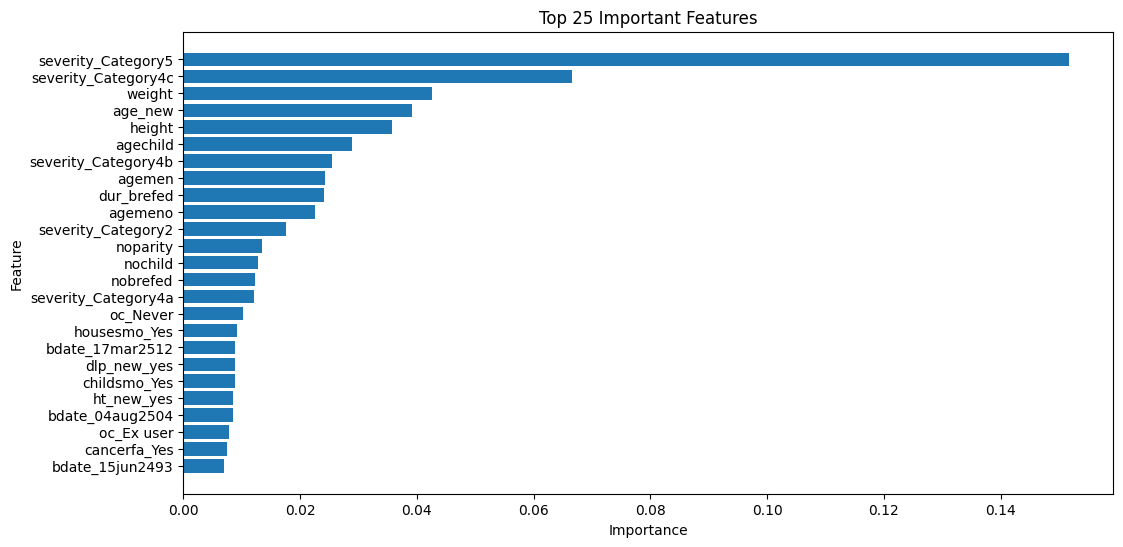

In [ ]:
# Selecting top 25 features
top_n = 25
top_features = feature_importance_df.head(top_n)

# Plotting the top features
plt.figure(figsize=(12, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 25 Important Features')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

In [ ]:
class_distribution = y.value_counts()
print(class_distribution)

1    15611
0      107
Name: diag_cancer_non-cancer, dtype: int64


Data is highly imbalanced with 15611 instance from Class 1 while only 107 class for 0. Handling imbalance class to increase the performance of models.

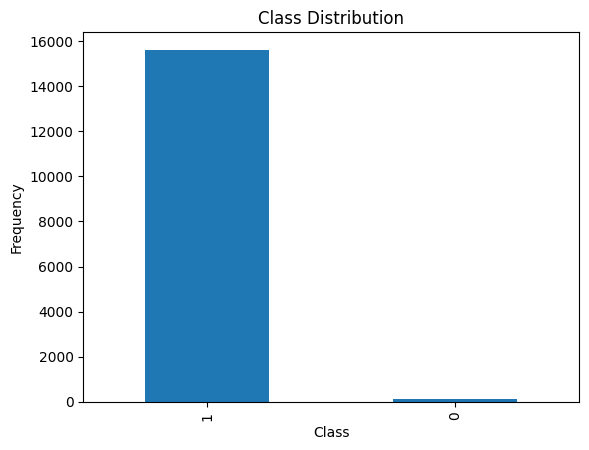

In [ ]:
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

## Handling imbalance classes

In [ ]:
# SMOTE - to oversample the minority to 10% of the majority class
sampling_strategy_over = 0.1
smote = SMOTE(sampling_strategy=sampling_strategy_over)

# Random under sampler - to reduce the majority class to twice the minority class
sampling_strategy_under = 0.5
under = RandomUnderSampler(sampling_strategy=sampling_strategy_under)

In [ ]:
# Create a pipeline that first oversamples and then undersamples
resample = Pipeline([('SMOTE', smote), ('Under', under)])

# Resample the training data
X_resampled, y_resampled = resample.fit_resample(X_train, y_train)
print(pd.Series(y_resampled).value_counts())

1    2184
0    1092
Name: diag_cancer_non-cancer, dtype: int64


Significantly reducing the imbalance of classes with remaining 2184 instance from Class 1 out of 15611 and increasing Class 0 to 1092 for better consistensy between models.

# For Adaptive Boost, please set the number of stump = 10

In [ ]:
# Initialize a decision tree classifier with max_depth=3 (stump)
base_estimator = DecisionTreeClassifier(max_depth=3)

# Initialize the AdaBoost classifier with 10 stumps
ada_boost = AdaBoostClassifier(base_estimator=base_estimator,
                               n_estimators=10, random_state=42)
ada_boost.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=10, random_state=42)

In [ ]:
# Predict on the test set
y_pred = ada_boost.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_rep)

Accuracy: 0.9756149279050043
              precision    recall  f1-score   support

           0       0.16      0.74      0.26        27
           1       1.00      0.98      0.99      4689

    accuracy                           0.98      4716
   macro avg       0.58      0.86      0.62      4716
weighted avg       0.99      0.98      0.98      4716



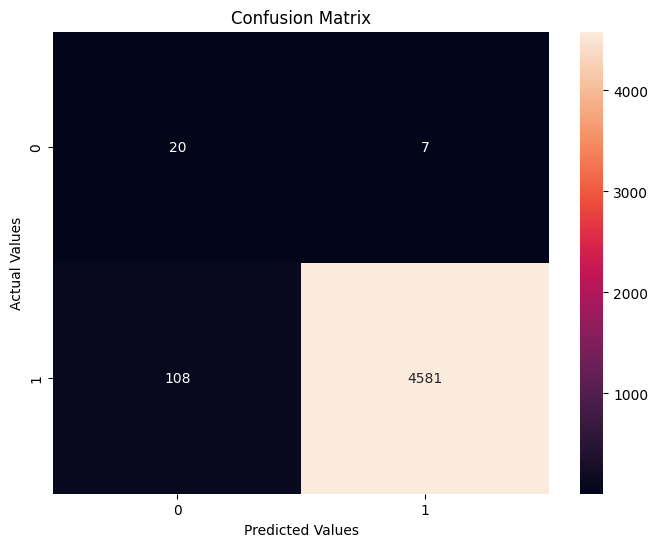

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

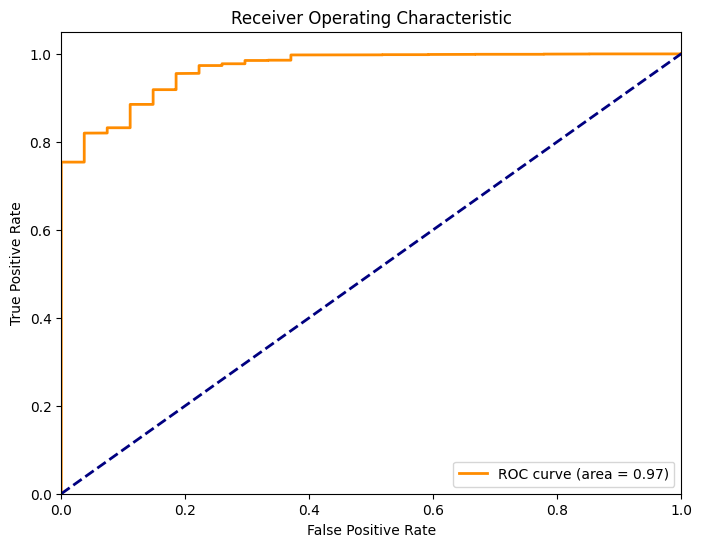

In [ ]:
fpr, tpr, _ = roc_curve(y_test, ada_boost.decision_function(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

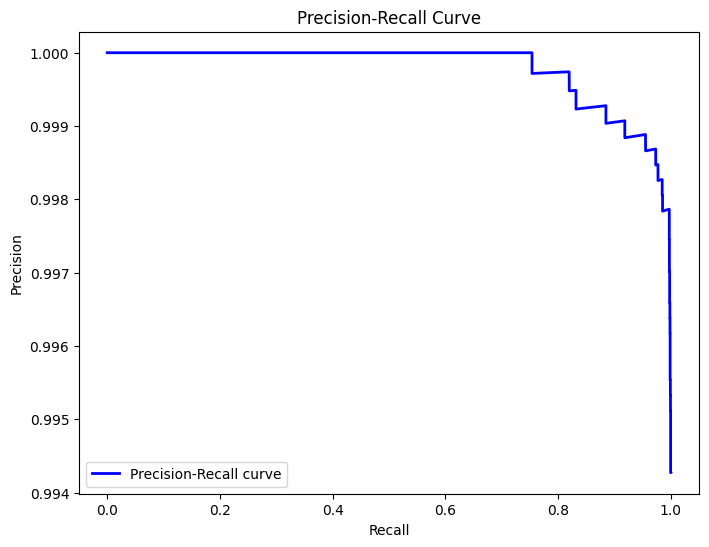

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, ada_boost.decision_function(X_test))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# For GBT, please set learning rate = 0.1 and number of tree = 10

In [ ]:
# Initialize the Gradient Boosting classifier
gbt_classifier = GradientBoostingClassifier(learning_rate=0.1,
                                            n_estimators=10, random_state=42)
gbt_classifier.fit(X_resampled, y_resampled)

GradientBoostingClassifier(n_estimators=10, random_state=42)

In [ ]:
# Predict on the test set
y_pred_gbt = gbt_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_gbt = accuracy_score(y_test, y_pred_gbt)
classification_rep_gbt = classification_report(y_test, y_pred_gbt)

print(f'Accuracy (Gradient Boosting): {accuracy_gbt}\n')
print(classification_rep_gbt)

Accuracy (Gradient Boosting): 0.8748939779474131

              precision    recall  f1-score   support

           0       0.04      0.85      0.07        27
           1       1.00      0.88      0.93      4689

    accuracy                           0.87      4716
   macro avg       0.52      0.86      0.50      4716
weighted avg       0.99      0.87      0.93      4716



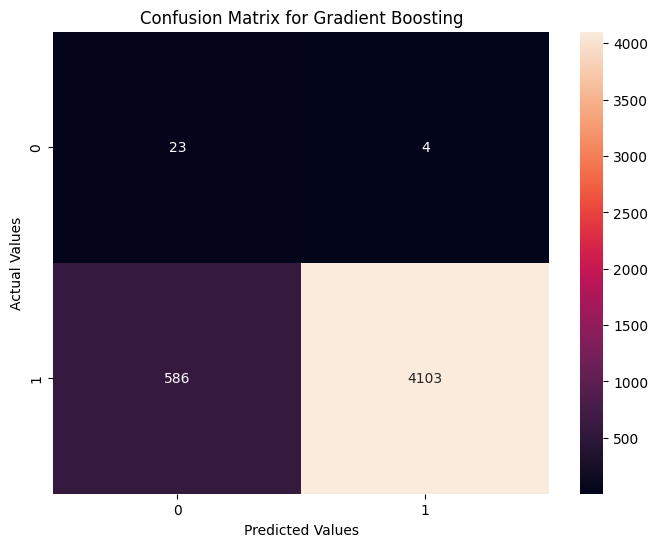

In [ ]:
cm_gbt = confusion_matrix(y_test, y_pred_gbt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbt, annot=True, fmt="d")
plt.title('Confusion Matrix for Gradient Boosting')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

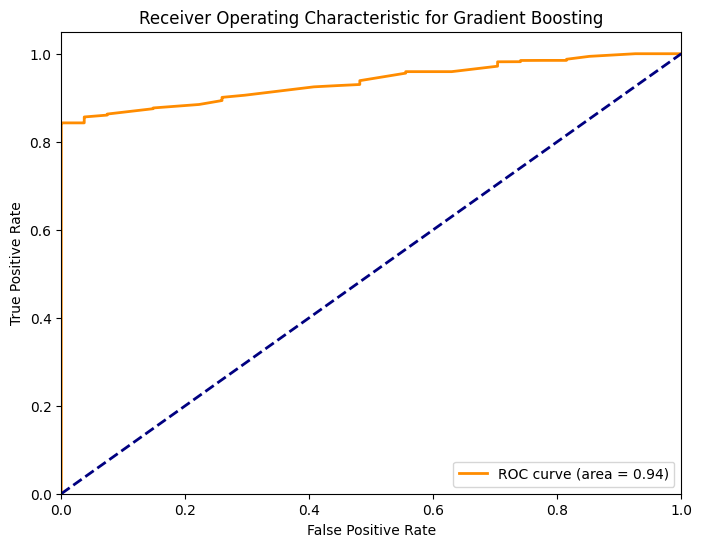

In [ ]:
fpr_gbt, tpr_gbt, _ = roc_curve(y_test, gbt_classifier.decision_function(X_test))
roc_auc_gbt = auc(fpr_gbt, tpr_gbt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gbt, tpr_gbt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_gbt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

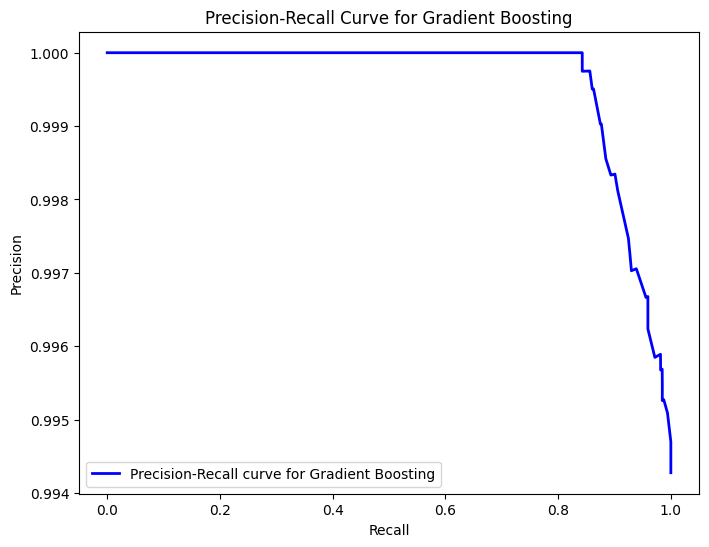

In [ ]:
precision_gbt, recall_gbt, _ = precision_recall_curve(y_test, gbt_classifier.decision_function(X_test))

plt.figure(figsize=(8, 6))
plt.plot(recall_gbt, precision_gbt, color='blue', lw=2, label='Precision-Recall curve for Gradient Boosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting')
plt.legend(loc="lower left")
plt.show()

# For XGBoost , please set λ= 0 , 𝛾=1, Max depth = 6 and 𝜀= 0.3 and number of tree = 10

In [ ]:
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',
    reg_lambda=0,
    gamma=1,
    max_depth=6,
    eta=0.3,
    n_estimators=10,
    random_state=42
)

# Train the model
xgb_classifier.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric=None,
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Predict on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

print(f'Accuracy (XGBoost): {accuracy_xgb}\n')
print(classification_rep_xgb)

Accuracy (XGBoost): 0.9614079728583546

              precision    recall  f1-score   support

           0       0.08      0.52      0.13        27
           1       1.00      0.96      0.98      4689

    accuracy                           0.96      4716
   macro avg       0.54      0.74      0.56      4716
weighted avg       0.99      0.96      0.98      4716



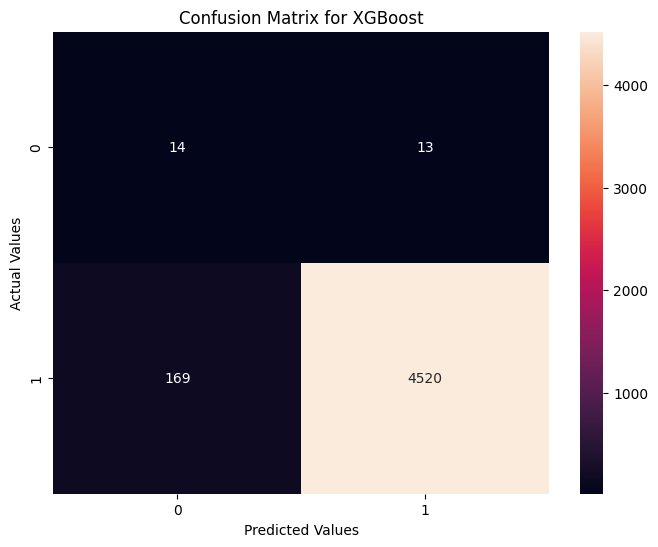

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d")
plt.title('Confusion Matrix for XGBoost')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

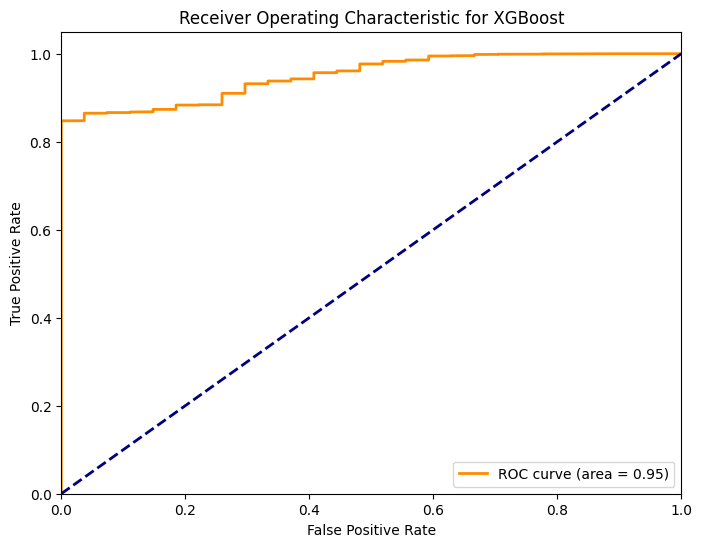

In [ ]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_classifier.predict_proba(X_test)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for XGBoost')
plt.legend(loc="lower right")
plt.show()

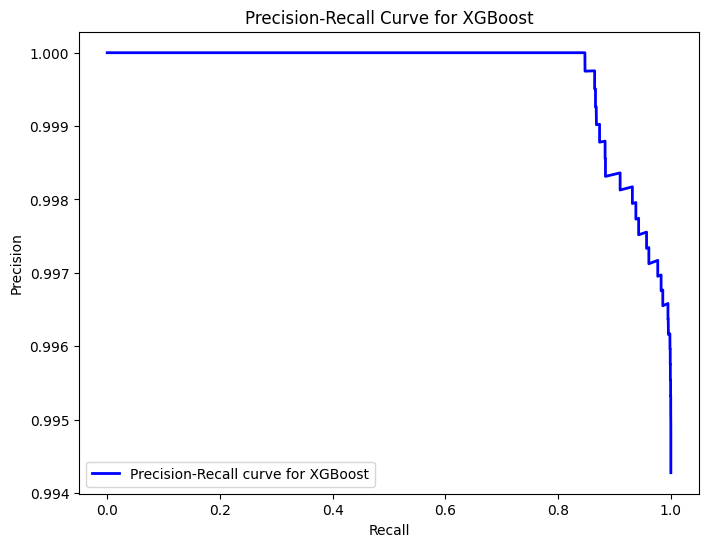

In [ ]:
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_classifier.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall_xgb, precision_xgb, color='blue', lw=2, label='Precision-Recall curve for XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost')
plt.legend(loc="lower left")
plt.show()

# Conclusion

AdaBoost is the best model among the three for the following reasons:

High Recall for the Minority Class: It has the highest recall for the minority class (0.74) it indicates a lower false negative rate.

F1-Score: It has a balance between precision and recall for the minority class, resulting in the highest f1-score among the models.

Overall Performance: While AdaBoost does not have the highest precision, it maintains a good balance between precision and recall, resulting in a high f1-score for the minority class without a substantial drop in performance for the majority class.

In medical diagnostics, the cost of false negatives can be very high (i.e., failing to identify a condition), so a model with a higher recall for the minority class (indicative of actual cancer cases) might be preferred, even at the expense of a higher false positive rate.

Note: Although accuracy is very importance metrics but in this case Class is highly imbalanced for which F1-score provide better understanding for the performance.